In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Load the dataset
df = pd.read_csv('sales.csv')

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Month  Sales
0      1  266.0
1      2  145.9
2      3  183.1
3      4  119.3
4      5  180.3


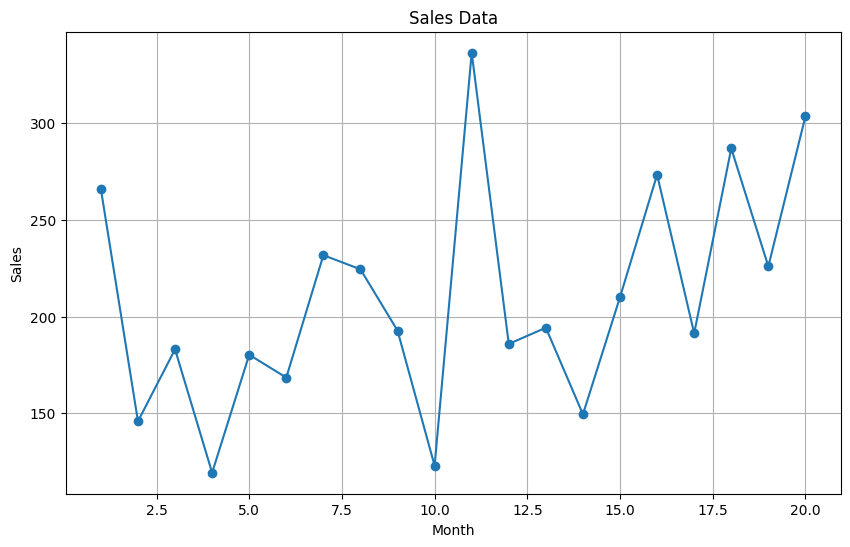

In [4]:
# Plotting the sales data
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sales'], marker='o')
plt.title('Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [5]:
# Splitting data into training and testing
train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)):]


In [6]:
# Training the model
model = ExponentialSmoothing(
    train['Sales'], trend='add', seasonal=None, seasonal_periods=12
).fit()


In [7]:
# Predicting on test data
test['Predicted_Sales'] = model.forecast(len(test))


C:\Users\Sciddhanto\AppData\Local\Temp\ipykernel_28548\3170676919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_Sales'] = model.forecast(len(test))


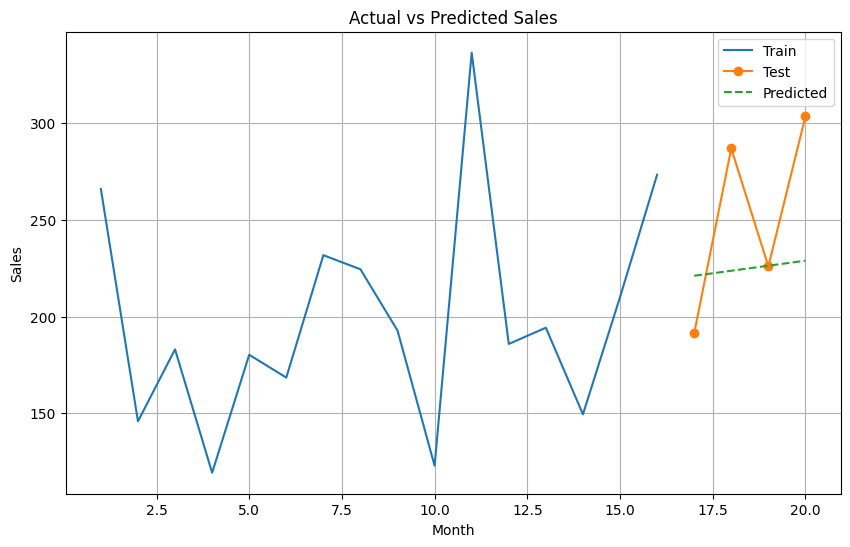

In [8]:
# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(train['Month'], train['Sales'], label='Train')
plt.plot(test['Month'], test['Sales'], label='Test', marker='o')
plt.plot(test['Month'], test['Predicted_Sales'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [9]:
# Calculating metrics
mse = np.mean((test['Sales'] - test['Predicted_Sales'])**2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2614.160513887622
